In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/inpatientCharges.csv")

In [3]:
df["Provider State"].value_counts()

,count
Provider State,
CA,13064
TX,11864
FL,11155
NY,9178
IL,7909
PA,7804
OH,7012
MI,5419
NC,5041


In [4]:
df=df.drop("Provider Id", axis=1)

In [5]:
df[['State_name', 'Region']] = df['Hospital Referral Region Description'].str.split('-', n=1, expand=True)

In [6]:
df.drop("Provider State", axis=1)

,DRG Definition,Provider Name,Provider Street Address,Provider City,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State_name,Region
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,AL,Dothan
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,AL,Birmingham
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,AL,Birmingham
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,AL,Birmingham
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,AL,Birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39,TX,Austin
163061,948 - SIGNS & SYMPTOMS W/O MCC,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72,TX,San Antonio
163062,948 - SIGNS & SYMPTOMS W/O MCC,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36,TX,Austin
163063,948 - SIGNS & SYMPTOMS W/O MCC,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54,TX,Dallas


In [7]:
df[['DRG_code', 'Procedure_name']] = df['DRG Definition'].str.split(' - ', n=1, expand=True)

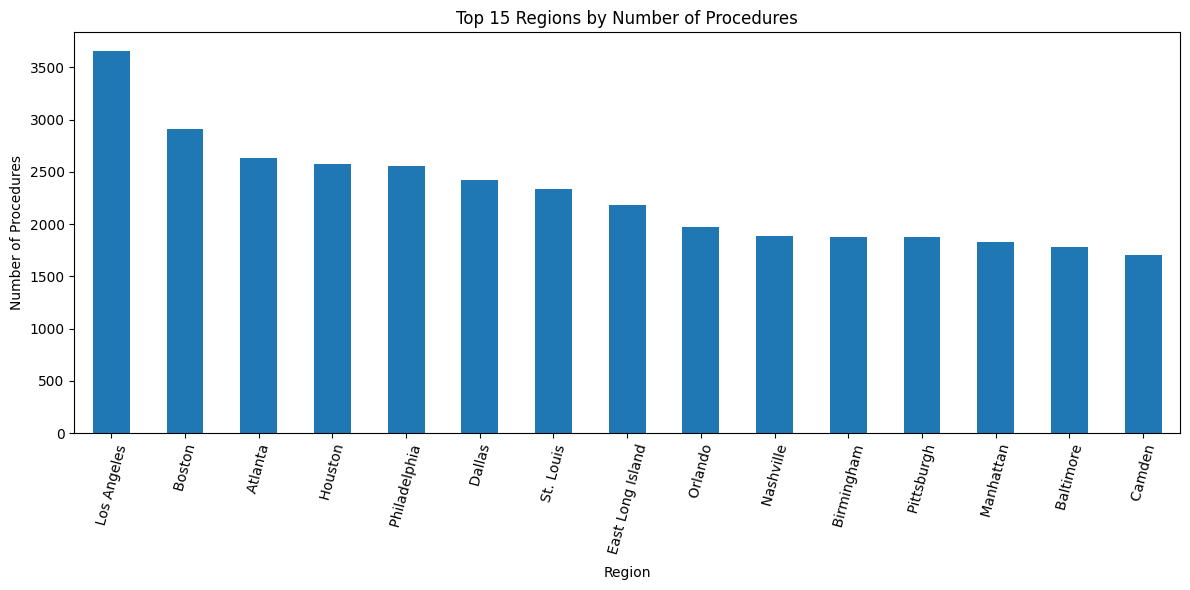

In [8]:
plt.figure(figsize=(12,6))
df['Region'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Regions by Number of Procedures")
plt.xlabel("Region")
plt.ylabel("Number of Procedures")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [9]:
#Convert all the columns "Average covered charges","Average medicare payments" ,"Average total payments" to numeric.
df[' Average Total Payments '] = df[' Average Total Payments '].astype(str).str.replace('$', '').str.extract('(\d+\.\d+)')
df['Average Medicare Payments'] = df['Average Medicare Payments'].astype(str).str.replace('$', '').str.extract('(\d+\.\d+)')

In [10]:
df[' Average Covered Charges '] = df[' Average Covered Charges '].astype(str).str.replace('$', '').str.extract('(\d+\.\d+)')
df[' Average Covered Charges ']=pd.to_numeric(df[' Average Covered Charges '])
df[' Average Total Payments ']=pd.to_numeric(df[' Average Total Payments '])
df['Average Medicare Payments']=pd.to_numeric(df['Average Medicare Payments'])

In [11]:
df.dtypes

,0
DRG Definition,object
Provider Name,object
Provider Street Address,object
Provider City,object
Provider State,object
Provider Zip Code,int64
Hospital Referral Region Description,object
Total Discharges,int64
Average Covered Charges,float64
Average Total Payments,float64


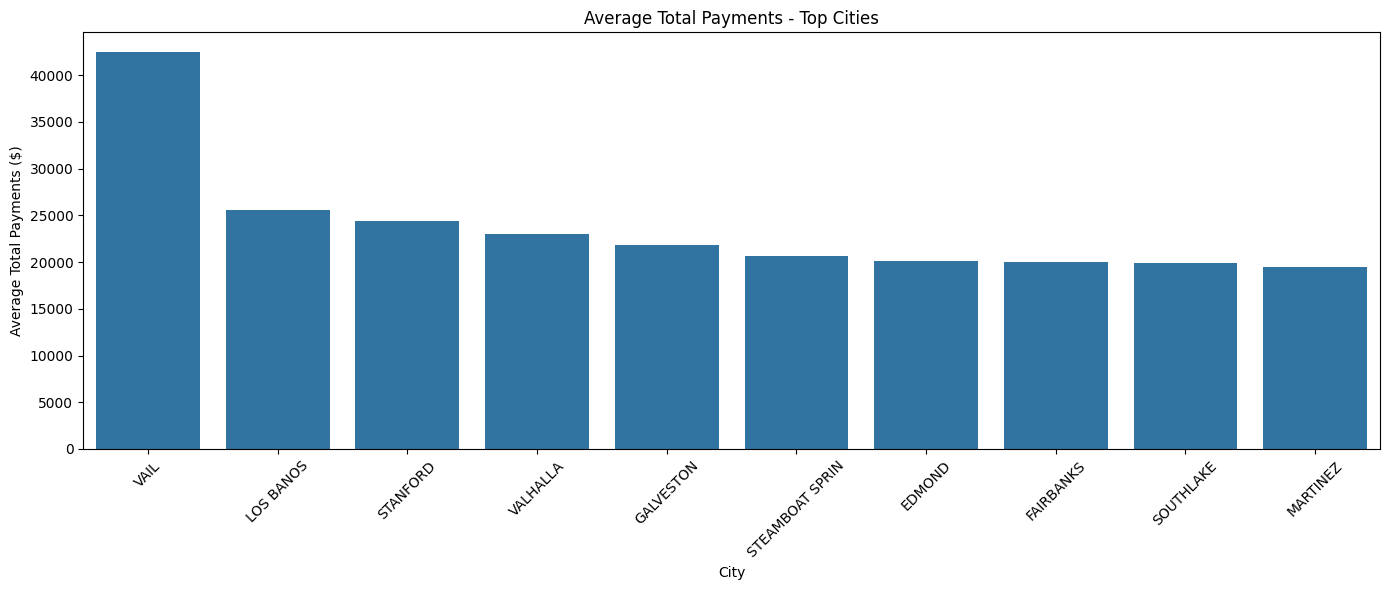

In [12]:
plt.figure(figsize=(14,6))
city_avg = df.groupby('Provider City')[' Average Total Payments '].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_avg.index, y=city_avg.values)
plt.xticks(rotation=45)
plt.title("Average Total Payments - Top Cities")
plt.ylabel("Average Total Payments ($)")
plt.xlabel("City")
plt.tight_layout()
plt.show()

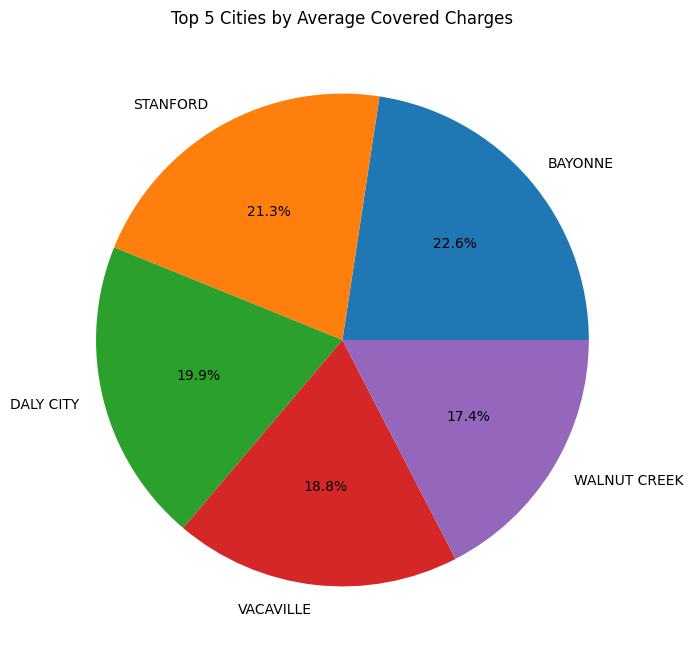

In [13]:
top_cities = df.groupby('Provider City')[' Average Covered Charges '].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,8))
top_cities.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title("Top 5 Cities by Average Covered Charges")
plt.show()

In [14]:
top_procedures = df.groupby('Procedure_name')[' Average Covered Charges '].mean().sort_values(ascending=False).head(5)
print(top_procedures)

Procedure_name
SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                              163227.331725
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS             143428.051066
INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                  139186.350937
MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC                              135330.939966
PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS     96348.806707
Name:  Average Covered Charges , dtype: float64


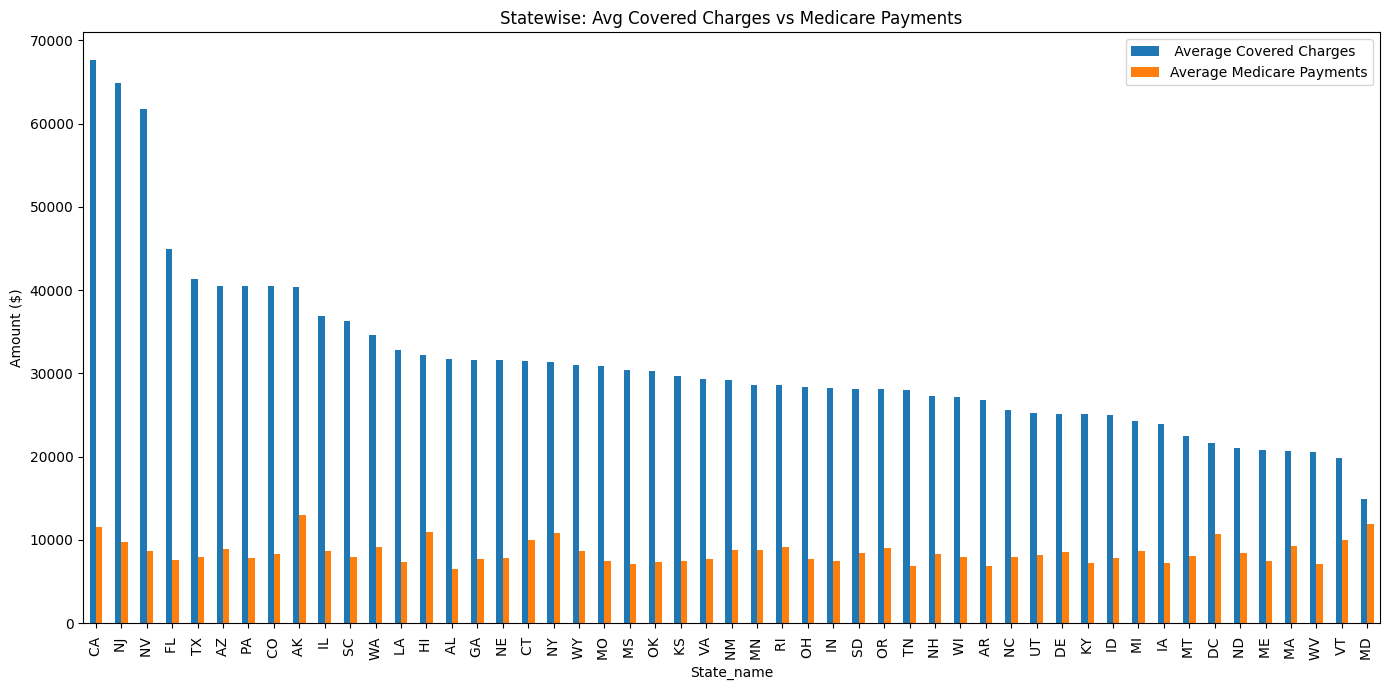

In [15]:
state_avg = df.groupby('State_name')[[' Average Covered Charges ', 'Average Medicare Payments']].mean()

state_avg.sort_values(by=' Average Covered Charges ', ascending=False, inplace=True)

state_avg.plot(kind='bar', figsize=(14,7))
plt.title("Statewise: Avg Covered Charges vs Medicare Payments")
plt.ylabel("Amount ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()